<a href="https://colab.research.google.com/github/scarletpeony/ProtBert-BFD-disoanno/blob/main/SGH_take_home_test_Soon_Ka_Hui%2C_Debbie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing packages

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 38.0 MB/s 
     |████████████████████████████████| 16.7 MB 48.1 MB/s 


In [2]:
!pip install matplotlib-label-lines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=726b7324efff0f21b0e26a480e087ed60ad8f755c057bdb225f48f5df9324b2c
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


# Importing dataset and preprocessing

In [4]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [165]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
# Reading data file
df = pd.read_csv(r"/content/drive/MyDrive/SGH Application/Data.csv")

In [64]:
# Converting Date column to date format.
df['Date']= pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date

In [65]:
# Creating an index column
id = df.index
df.insert(0, 'id', id)

In [66]:
# Creating variables divided by 1000
df['DailyTests_per_1000'] = df['Daily tests'].div(1000)
df['Cases_per_1000'] = df['Cases'].div(1000)
df['Deaths_per_1000'] = df['Deaths'].div(1000)

In [67]:
# https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
# generate country code  based on country name for creating world maps in later section
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
code = alpha3code(df.Entity)
df.insert(1, 'CODE', code)

In [68]:
df

id CODE    Entity Continent  Latitude  Longitude  \
0          0  ALB   Albania    Europe     41.15      20.17   
1          1  ALB   Albania    Europe     41.15      20.17   
2          2  ALB   Albania    Europe     41.15      20.17   
3          3  ALB   Albania    Europe     41.15      20.17   
4          4  ALB   Albania    Europe     41.15      20.17   
...      ...  ...       ...       ...       ...        ...   
38467  38467  ZWE  Zimbabwe    Africa    -19.02      29.15   
38468  38468  ZWE  Zimbabwe    Africa    -19.02      29.15   
38469  38469  ZWE  Zimbabwe    Africa    -19.02      29.15   
38470  38470  ZWE  Zimbabwe    Africa    -19.02      29.15   
38471  38471  ZWE  Zimbabwe    Africa    -19.02      29.15   

       Average temperature per year  Hospital beds per 1000 people  \
0                                14                           2.89   
1                                14                           2.89   
2                                14                           2.89   
3                                14                           2.89   
4                                14                           2.89   
...                             ...                            ...   
38467                            20                           1.70   
38468                            20                           1.70   
38469                            20                           1.70   
38470                            20                           1.70   
38471                            20                           1.70   

       Medical doctors per 1000 people  GDP/Capita  Population  Median age  \
0                                 1.29      5353.2     2873457          38   
1                                 1.29      5353.2     2873457          38   
2                                 1.29      5353.2     2873457          38   
3                                 1.29      5353.2     2873457          38   
4                                 1.29      5353.2     2873457          38   
...                                ...         ...         ...         ...   
38467                             0.08      1464.0    16529904          19   
38468                             0.08      1464.0    16529904          19   
38469                             0.08      1464.0    16529904          19   
38470                             0.08      1464.0    16529904          19   
38471                             0.08      1464.0    16529904          19   

       Population aged 65 and over (%)        Date  Daily tests    Cases  \
0                                   14  2020-02-25          8.0      NaN   
1                                   14  2020-02-26          5.0      NaN   
2                                   14  2020-02-27          4.0      NaN   
3                                   14  2020-02-28          1.0      NaN   
4                                   14  2020-02-29          8.0      NaN   
...                                ...         ...          ...      ...   
38467                                3  2021-02-24       1804.0  35960.0   
38468                                3  2021-02-25       2965.0  35994.0   
38469                                3  2021-02-26          NaN  36044.0   
38470                                3  2021-02-27          NaN  36058.0   
38471                                3  2021-02-28          NaN  36089.0   

       Deaths  DailyTests_per_1000  Cases_per_1000  Deaths_per_1000  
0         NaN                0.008             NaN              NaN  
1         NaN                0.005             NaN              NaN  
2         NaN                0.004             NaN              NaN  
3         NaN                0.001             NaN              NaN  
4         NaN                0.008             NaN              NaN  
...       ...                  ...             ...              ...  
38467  1456.0                1.804          35.960            1.456  
38468  1458.0 

In [70]:
df.describe()

id      Latitude     Longitude  Average temperature per year  \
count  38472.000000  38472.000000  38472.000000                  38472.000000   
mean   19235.500000     23.737060     20.210847                     17.717145   
std    11106.054115     26.060413     61.074922                      8.134926   
min        0.000000    -40.900000   -106.350000                     -2.000000   
25%     9617.750000      8.620000     -3.440000                     11.000000   
50%    19235.500000     27.510000     21.820000                     20.000000   
75%    28853.250000     45.940000     47.480000                     25.000000   
max    38471.000000     64.960000    179.410000                     29.000000   

       Hospital beds per 1000 people  Medical doctors per 1000 people  \
count                   38472.000000                     38472.000000   
mean                        3.165305                         2.086313   
std                         2.561767                         1.518252   
min                         0.200000                         0.020000   
25%                         1.400000                         0.820000   
50%                         2.500000                         1.890000   
75%                         4.490000                         3.210000   
max                        13.050000                         7.520000   

          GDP/Capita    Population    Median age  \
count   38472.000000  3.847200e+04  38472.000000   
mean    19002.331415  4.896983e+07     32.751508   
std     22271.107786  1.427251e+08      8.472305   
min       411.600000  3.412840e+05     16.000000   
25%      3659.000000  4.793900e+06     27.000000   
50%      8821.800000  1.148464e+07     32.000000   
75%     25946.200000  4.286296e+07     41.000000   
max    114704.600000  1.339180e+09     48.000000   

       Population aged 65 and over (%)   Daily tests         Cases  \
count                     38472.000000  3.057700e+04  3.821800e+04   
mean                         10.663392  3.944059e+04  2.879027e+05   
std                           6.770417  1.501847e+05  1.405243e+06   
min                           1.000000 -2.391720e+05  1.000000e+00   
25%                           5.000000  1.505000e+03  2.074000e+03   
50%                           8.000000  5.520000e+03  2.143100e+04   
75%                          16.000000  2.038200e+04  1.373770e+05   
max                          28.000000  2.945871e+06  2.860567e+07   

              Deaths  DailyTests_per_1000  Cases_per_1000  Deaths_per_1000  
count   34862.000000         30577.000000    38218.000000     34862.000000  
mean     8090.504733            39.440594      287.902657         8.090505  
std     29548.753221           150.184660     1405.242872        29.548753  
min         1.000000          -239.172000        0.001000         0.001000  
25%        77.000000             1.505000        2.074000         0.077000  
50%       527.000000             5.520000       21.431000         0.527000  
75%      3480.500000            20.382000      137.377000         3.480500  
max    513091.000000          2945.871000    28605.669000       513.091000

In [71]:
# Creating tests pivot table in pandas as there is no PIVOT function in SQLite
dftests = df[['Date','Entity','DailyTests_per_1000']]
dftests_T = df.pivot('Date', 'Entity', 'DailyTests_per_1000')

In [72]:
# Filtering for countries with greater than 500,000 tests a day
filtertests = (dftests_T>500).any()
dftests_T_sub = dftests_T.loc[: , filtertests]

In [158]:
dftests_T_sub

Entity      Austria  France  India   Russia  Slovakia  United Kingdom  \
Date                                                                    
2020-01-01      NaN     NaN    NaN      NaN       NaN             NaN   
2020-01-02      NaN     NaN    NaN      NaN       NaN             NaN   
2020-01-03      NaN     NaN    NaN      NaN       NaN             NaN   
2020-01-04      NaN     NaN    NaN      NaN       NaN             NaN   
2020-01-05      NaN     NaN    NaN      NaN       NaN             NaN   
...             ...     ...    ...      ...       ...             ...   
2021-02-24  261.319     NaN    NaN  162.804   136.118         740.717   
2021-02-25  268.901     NaN    NaN  265.528   130.452             NaN   
2021-02-26      NaN     NaN    NaN      NaN       NaN             NaN   
2021-02-27      NaN     NaN    NaN      NaN       NaN             NaN   
2021-02-28      NaN     NaN    NaN      NaN       NaN             NaN   

Entity      United States  
Date                       
2020-01-01            NaN  
2020-01-02            NaN  
2020-01-03            NaN  
2020-01-04            NaN  
2020-01-05            NaN  
...                   ...  
2021-02-24            NaN  
2021-02-25            NaN  
2021-02-26            NaN  
2021-02-27            NaN  
2021-02-28            NaN  

[425 rows x 7 columns]

In [74]:
# Creating cases pivot table in pandas as there is no PIVOT function in SQLite
dfcases = df[['Date','Entity','Cases_per_1000']]
dfcases_T = df.pivot('Date', 'Entity', 'Cases_per_1000')


In [75]:
# Filtering for countries with greater than 2000,000 cases a day
filtercases = (dfcases_T>2000).any()
dfcases_T_sub = dfcases_T.loc[: , filtercases]

In [157]:
dfcases_T_sub

Entity      Argentina  Colombia    France      India     Italy    Mexico  \
Date                                                                       
2020-01-01        NaN       NaN       NaN        NaN       NaN       NaN   
2020-01-02        NaN       NaN       NaN        NaN       NaN       NaN   
2020-01-03        NaN       NaN       NaN        NaN       NaN       NaN   
2020-01-04        NaN       NaN       NaN        NaN       NaN       NaN   
2020-01-05        NaN       NaN       NaN        NaN       NaN       NaN   
...               ...       ...       ...        ...       ...       ...   
2021-02-24   2085.411  2237.542  3721.061  11046.914  2848.564  2060.908   
2021-02-25   2093.645  2241.225  3746.475  11063.491  2868.435  2069.370   
2021-02-26   2098.728  2244.792  3746.707  11079.979  2888.923  2076.882   
2021-02-27   2104.197  2248.135  3747.263  11096.731  2907.825  2084.128   
2021-02-28   2107.365  2251.690  3747.263  11112.241  2925.265  2086.938   

Entity        Russia    Turkey  United Kingdom  United States  
Date                                                           
2020-01-01       NaN       NaN             NaN            NaN  
2020-01-02       NaN       NaN             NaN            NaN  
2020-01-03       NaN       NaN             NaN            NaN  
2020-01-04       NaN       NaN             NaN            NaN  
2020-01-05       NaN       NaN             NaN            NaN  
...              ...       ...             ...            ...  
2021-02-24  4153.735  2665.194        4156.707      28336.097  
2021-02-25  4164.802  2674.766        4166.727      28413.388  
2021-02-26  4175.757  2683.971        4175.315      28490.179  
2021-02-27  4187.166  2693.164        4182.772      28554.465  
2021-02-28  4198.400  2701.588        4188.827      28605.669  

[425 rows x 10 columns]

In [77]:
# Creating deaths pivot table in pandas as there is no PIVOT function in SQLite
dfdeaths = df[['Date','Entity','Deaths_per_1000']]
dfdeaths_T = df.pivot('Date', 'Entity', 'Deaths_per_1000')

In [78]:
# Filtering for countries with greater than 50,000 deaths a day
filterdeaths = (dfdeaths_T>50).any()
dfdeaths_T_sub = dfdeaths_T.loc[: , filterdeaths]

In [156]:
dfdeaths_T_sub

Entity      Argentina  Colombia  France    India    Iran   Italy   Mexico  \
Date                                                                        
2020-01-01        NaN       NaN     NaN      NaN     NaN     NaN      NaN   
2020-01-02        NaN       NaN     NaN      NaN     NaN     NaN      NaN   
2020-01-03        NaN       NaN     NaN      NaN     NaN     NaN      NaN   
2020-01-04        NaN       NaN     NaN      NaN     NaN     NaN      NaN   
2020-01-05        NaN       NaN     NaN      NaN     NaN     NaN      NaN   
...               ...       ...     ...      ...     ...     ...      ...   
2021-02-24     51.650    59.260  85.473  156.705  59.736  96.666  182.815   
2021-02-25     51.795    59.396  85.734  156.825  59.830  96.974  183.692   
2021-02-26     51.887    59.518  85.738  156.938  59.899  97.227  184.474   
2021-02-27     51.946    59.660  85.741  157.051  59.980  97.507  185.257   
2021-02-28     51.965    59.766  85.741  157.157  60.073  97.699  185.715   

Entity      Russia  United Kingdom  United States  
Date                                               
2020-01-01     NaN             NaN            NaN  
2020-01-02     NaN             NaN            NaN  
2020-01-03     NaN             NaN            NaN  
2020-01-04     NaN             NaN            NaN  
2020-01-05     NaN             NaN            NaN  
...            ...             ...            ...  
2021-02-24  83.044         121.979        505.902  
2021-02-25  83.481         122.303        508.313  
2021-02-26  83.900         122.648        510.458  
2021-02-27  84.330         122.939        511.994  
2021-02-28  84.700         123.083        513.091  

[425 rows x 10 columns]

# Creating normalised tables in SQLite

In [80]:
# Creating country table with country specific information
countrydf = df
countrydf = countrydf.drop(['Date', 'Daily tests', 'Cases', 'Deaths', 'Cases_per_1000', 'Deaths_per_1000', 'DailyTests_per_1000'], axis = 1)
countrydf.head()

id CODE   Entity Continent  Latitude  Longitude  \
0   0  ALB  Albania    Europe     41.15      20.17   
1   1  ALB  Albania    Europe     41.15      20.17   
2   2  ALB  Albania    Europe     41.15      20.17   
3   3  ALB  Albania    Europe     41.15      20.17   
4   4  ALB  Albania    Europe     41.15      20.17   

   Average temperature per year  Hospital beds per 1000 people  \
0                            14                           2.89   
1                            14                           2.89   
2                            14                           2.89   
3                            14                           2.89   
4                            14                           2.89   

   Medical doctors per 1000 people  GDP/Capita  Population  Median age  \
0                             1.29      5353.2     2873457          38   
1                             1.29      5353.2     2873457          38   
2                             1.29      5353.2     2873457          38   
3                             1.29      5353.2     2873457          38   
4                             1.29      5353.2     2873457          38   

   Population aged 65 and over (%)  
0                               14  
1                               14  
2                               14  
3                               14  
4                               14

In [81]:
# Creating daily table with daily data
dailydf = df[['id', 'CODE','Entity', 'Continent', 'Date', 'Daily tests', 'DailyTests_per_1000', 'Cases', 'Cases_per_1000', 'Deaths', 'Deaths_per_1000']]
dailydf.head()

id CODE   Entity Continent        Date  Daily tests  DailyTests_per_1000  \
0   0  ALB  Albania    Europe  2020-02-25          8.0                0.008   
1   1  ALB  Albania    Europe  2020-02-26          5.0                0.005   
2   2  ALB  Albania    Europe  2020-02-27          4.0                0.004   
3   3  ALB  Albania    Europe  2020-02-28          1.0                0.001   
4   4  ALB  Albania    Europe  2020-02-29          8.0                0.008   

   Cases  Cases_per_1000  Deaths  Deaths_per_1000  
0    NaN             NaN     NaN              NaN  
1    NaN             NaN     NaN              NaN  
2    NaN             NaN     NaN              NaN  
3    NaN             NaN     NaN              NaN  
4    NaN             NaN     NaN              NaN

In [82]:
# Connect to a database
conn = sqlite3.connect('covid-19.db')
# Create a cursor
c = conn.cursor()

In [83]:
# Read datasets into SQL
countrydf.to_sql("country", conn, if_exists = "replace", index = False)
dailydf.to_sql("daily", conn, if_exists = "replace", index = False)
dfdeaths_T.to_sql("deaths", conn, if_exists = "replace", index = True)
dfdeaths_T_sub.to_sql("deaths_sub", conn, if_exists = "replace", index = True)
dfcases_T.to_sql("cases", conn, if_exists = "replace", index = True)
dfcases_T_sub.to_sql("cases_sub", conn, if_exists = "replace", index = True)
dftests_T.to_sql("tests", conn, if_exists = "replace", index = True)
dftests_T_sub.to_sql("tests_sub", conn, if_exists = "replace", index = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


# Visualisations

### Visualisation: Number of daily tests over time

In [84]:
from labellines import labelLine, labelLines

In [85]:
sql1 = """SELECT * FROM tests;"""
data1 = pd.read_sql(sql1, conn, index_col = ['Date'])

/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Albania) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Algeria) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Armenia) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Australia) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Austria) could not be annotated due to `nans` values. Consider using another location via the `x

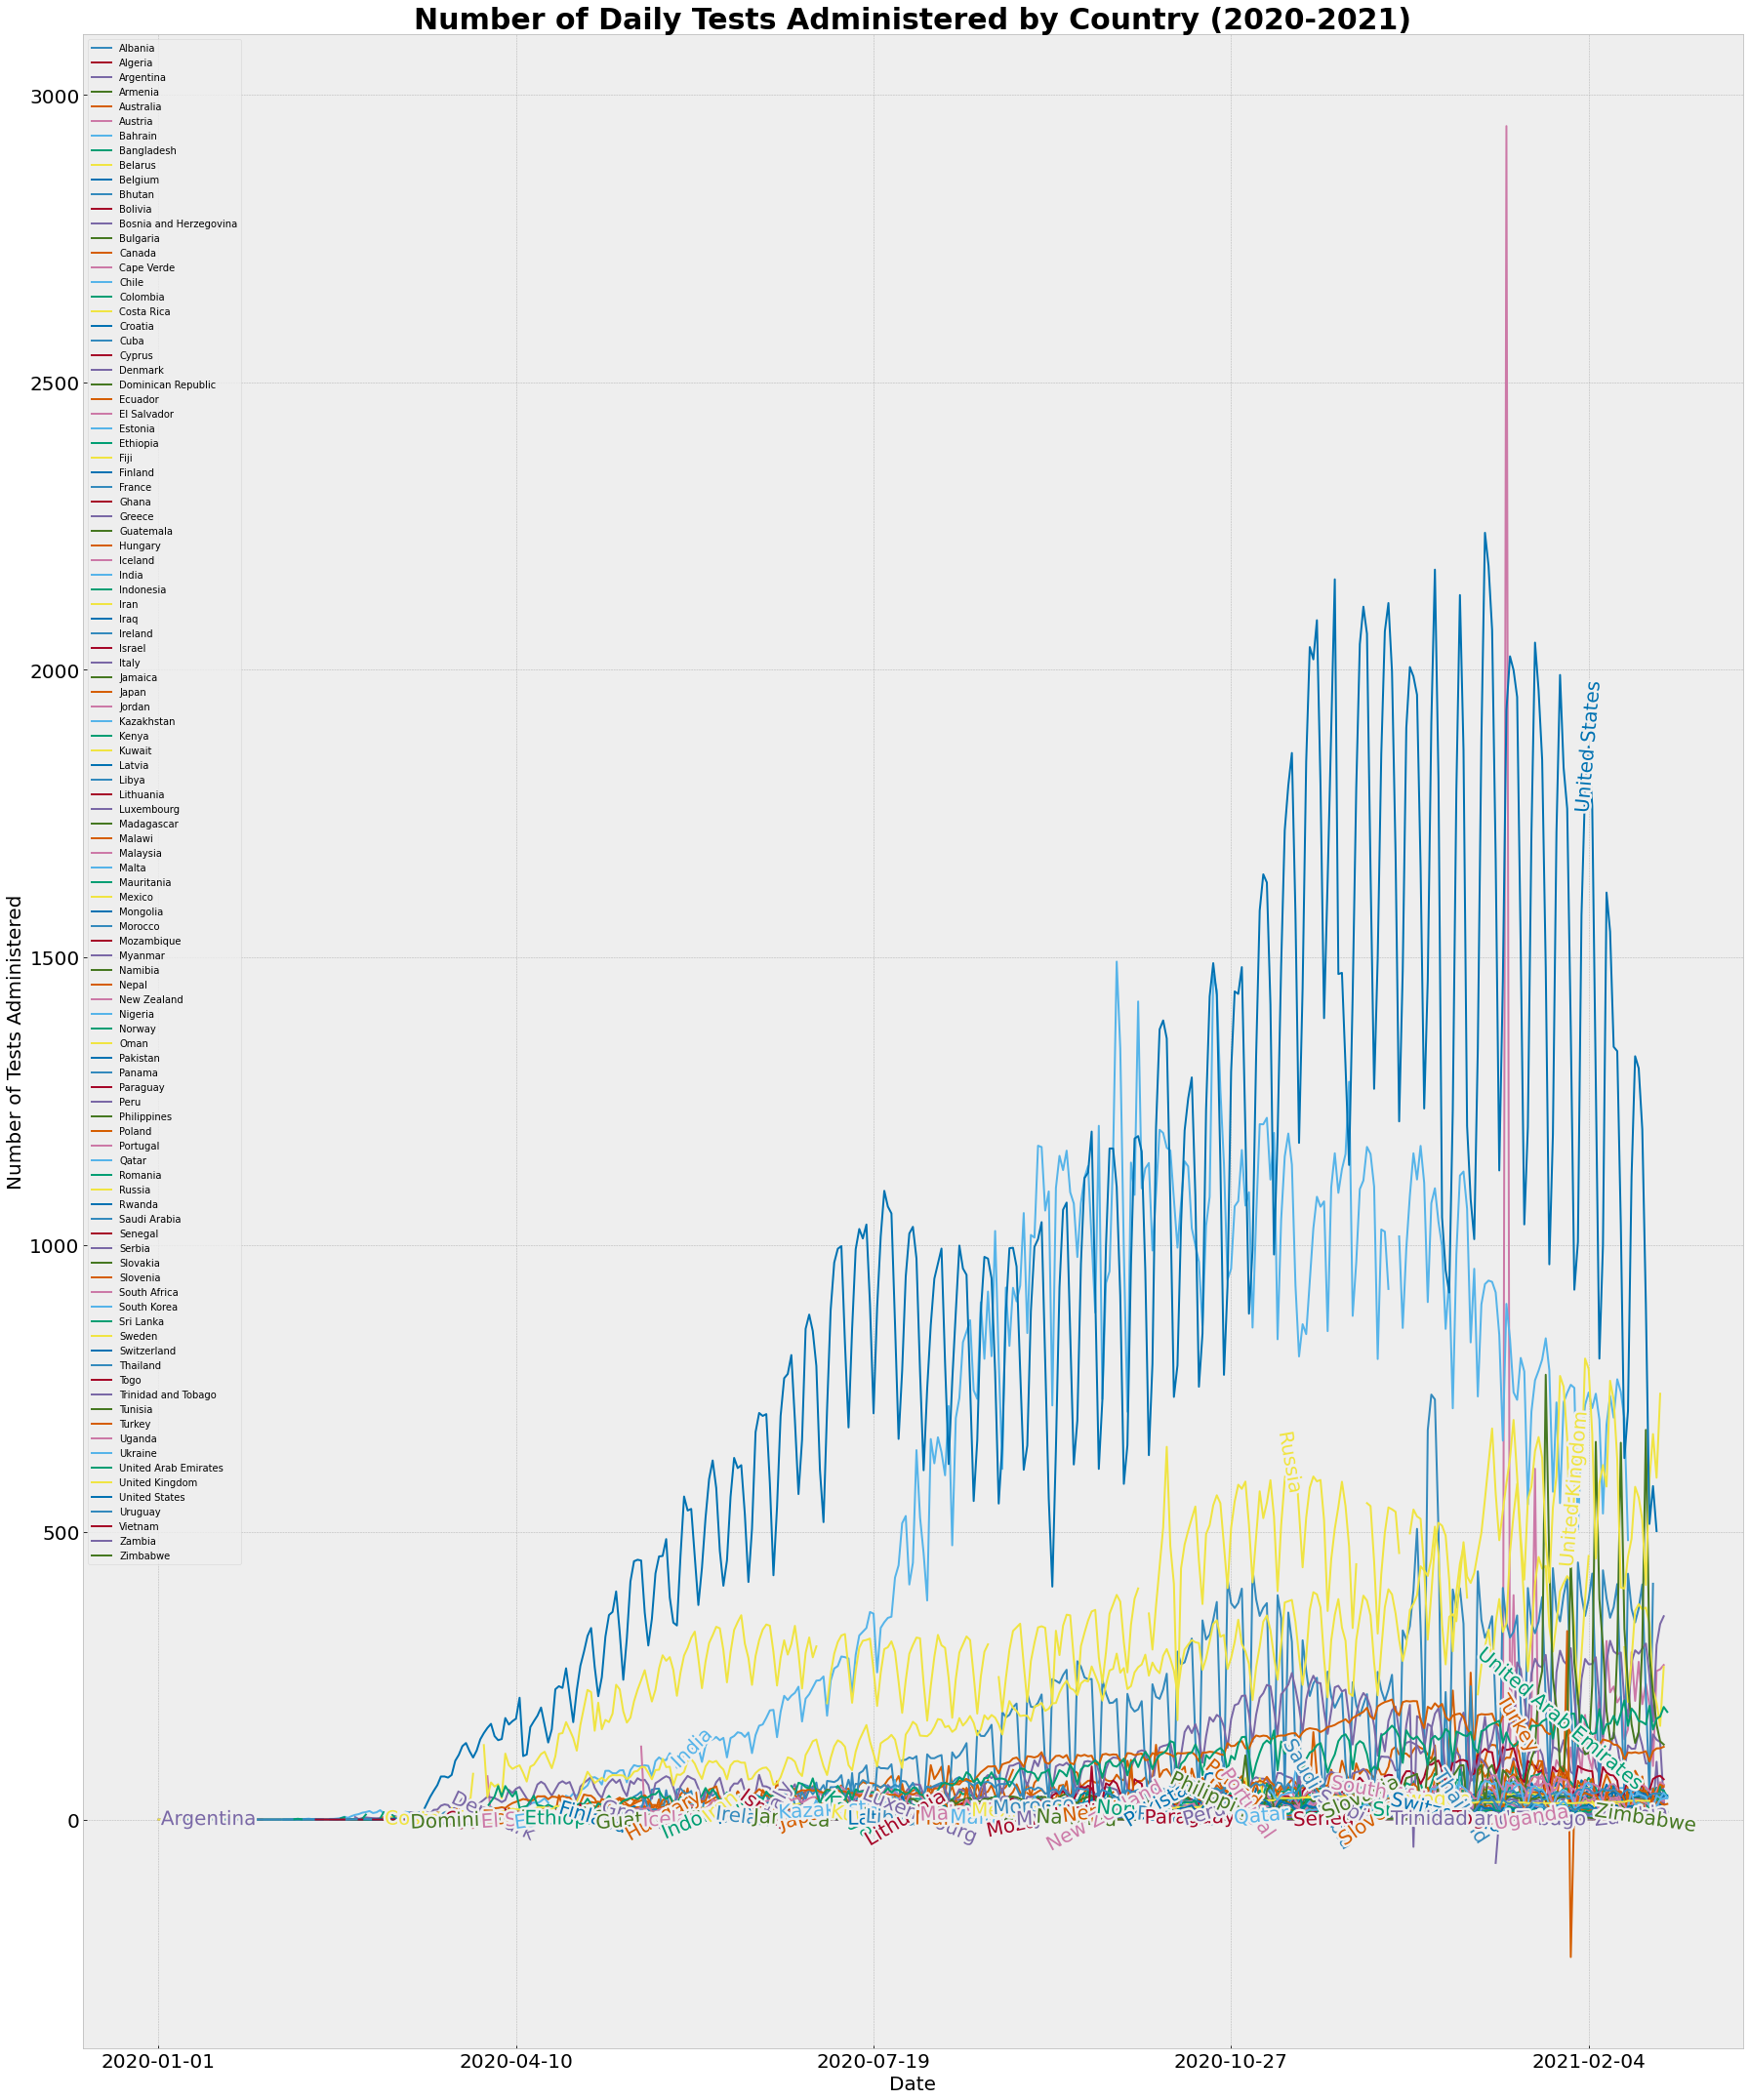

In [89]:
# Plotting daily tests per 1000 for all listed countries.
ax = data1.plot(figsize = (25,30), use_index=True)
ax.set_ylabel("Number of Tests Administered", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.get_legend().remove()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ["Lucida Grande"]
plt.title('Number of Daily Tests Administered by Country (2020-2021)', fontsize=30, fontweight = "bold")
plt.legend(loc='upper left', fontsize=10)
plt.ticklabel_format(style='plain', axis = 'y')
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=20)
plt.show()

In [87]:
sql2 = """SELECT * FROM tests_sub;"""
data2 = pd.read_sql(sql2, conn, index_col = ['Date'])

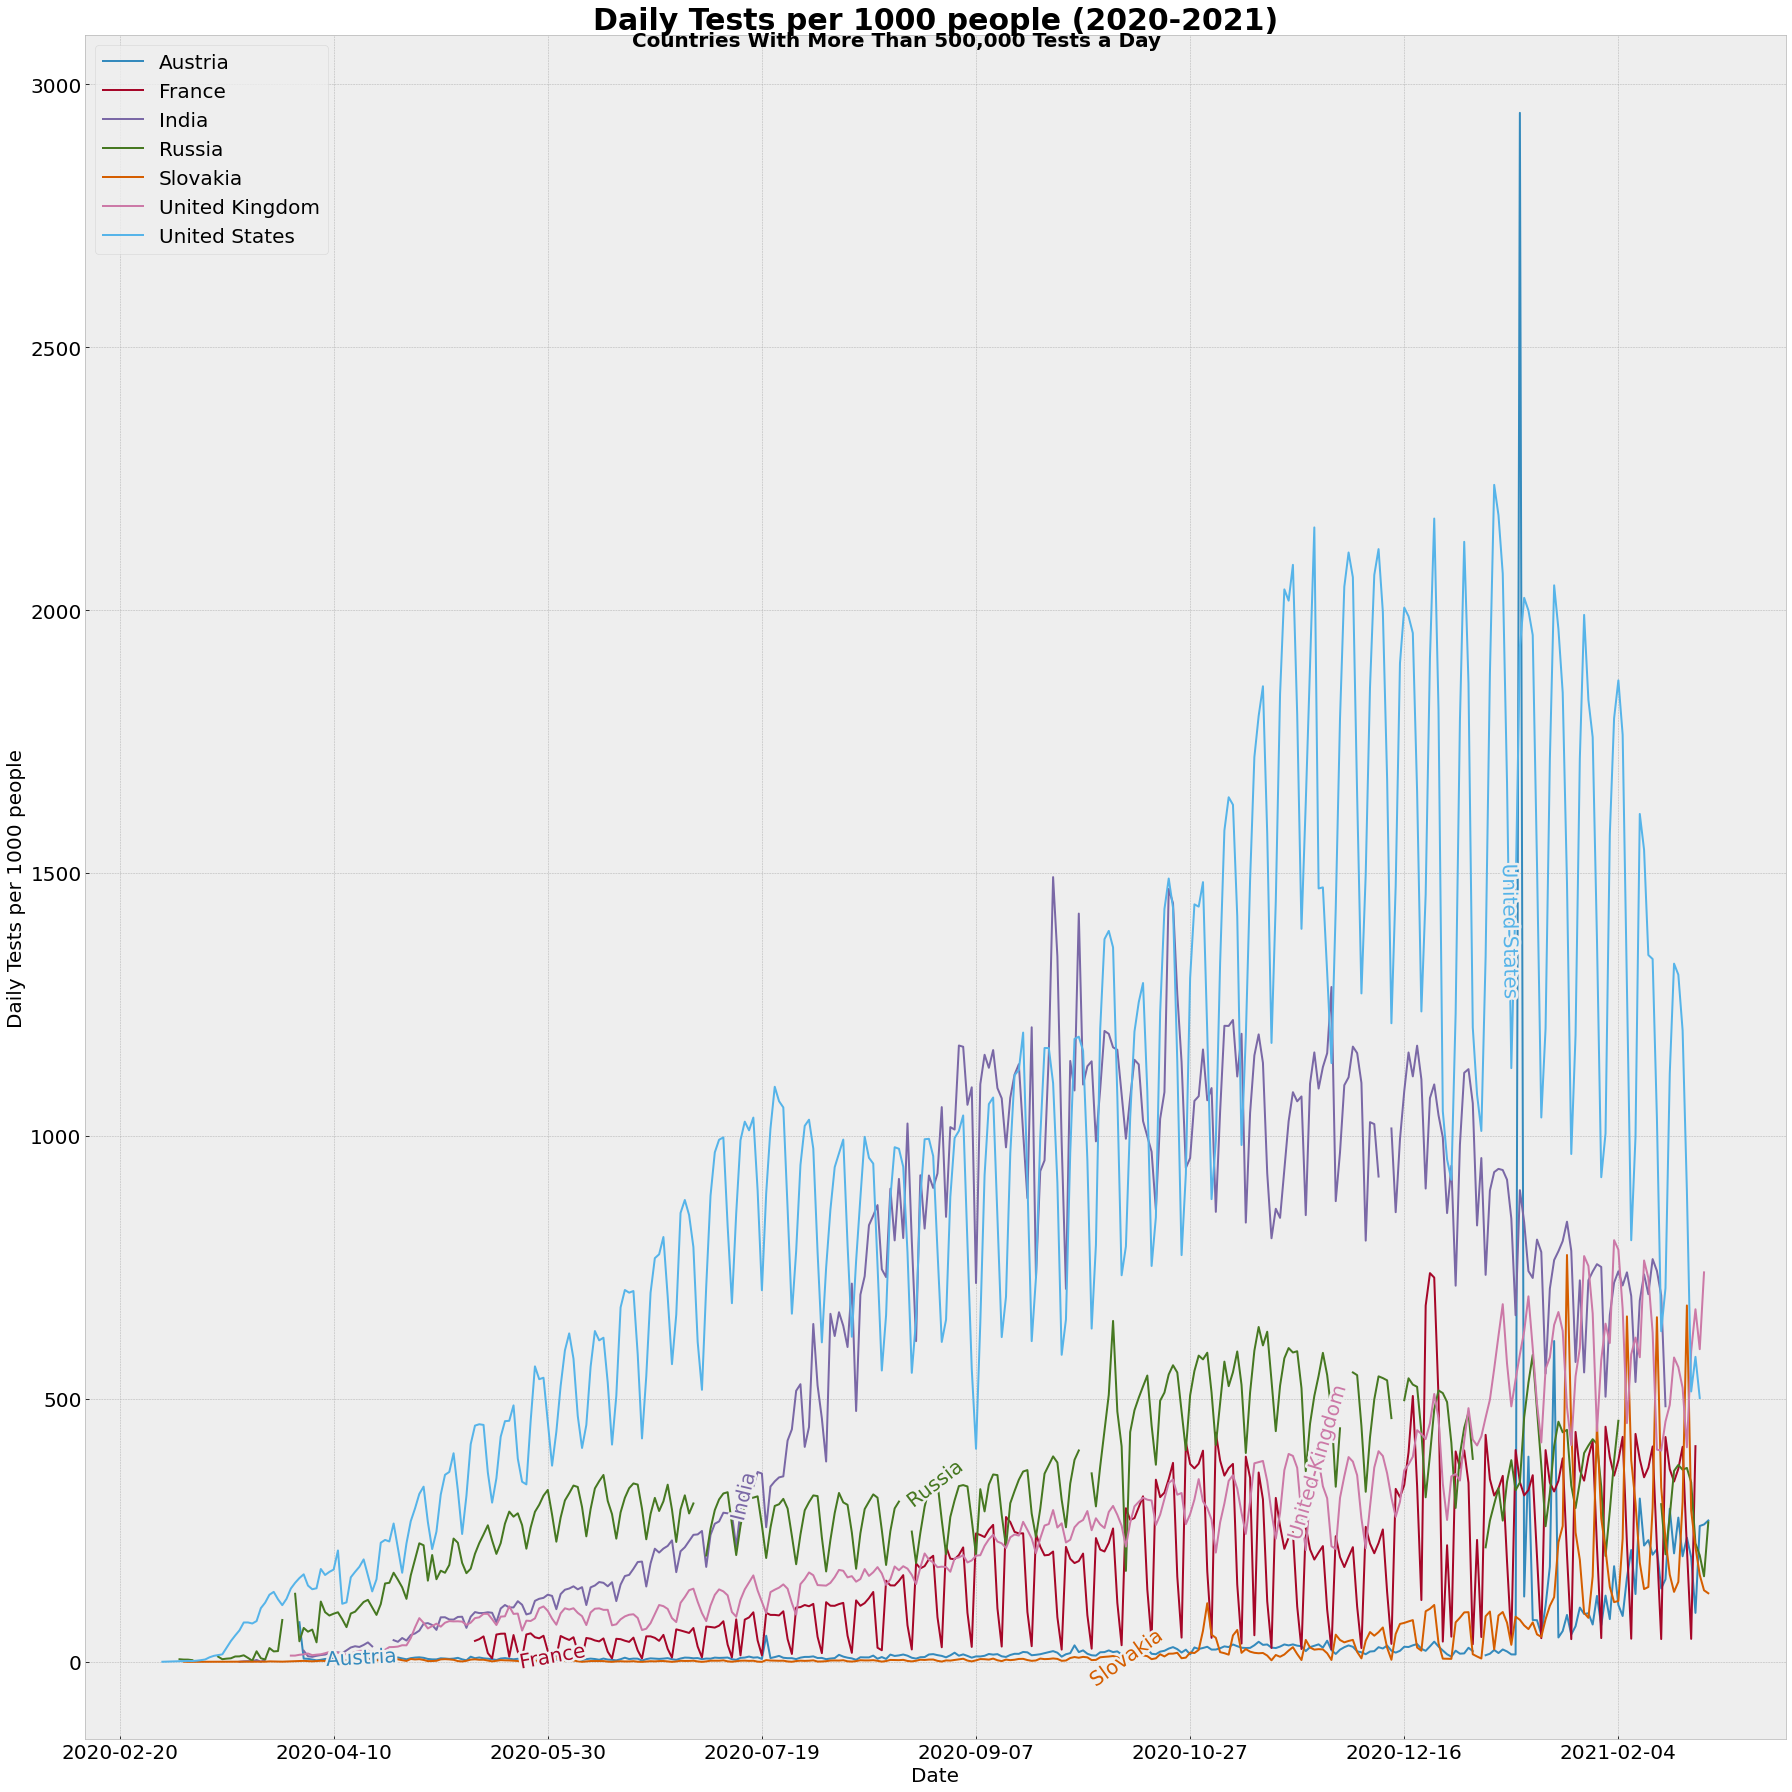

In [162]:
# Plotting daily tests per 1000 for subset of countries.
ax = data2.plot(figsize = (25,25), use_index=True)
ax.set_ylabel("Daily Tests per 1000 people", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.get_legend().remove()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ["Lucida Grande"]
plt.title('Daily Tests per 1000 people (2020-2021)', fontsize=30, fontweight = "bold")
plt.suptitle('Countries With More Than 500,000 Tests a Day',fontsize=20, fontweight = 'bold')
plt.legend(loc='upper left', fontsize=20)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=20)
plt.show()

### Visualisation: Number of cumulative cases over time

In [31]:
from labellines import labelLine, labelLines

In [32]:
sql3 = """SELECT * FROM cases;"""
data3 = pd.read_sql(sql3, conn, index_col = ['Date'])

/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Albania) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Algeria) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Argentina) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Armenia) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Austria) could not be annotated due to `nans` values. Consider using another location via the `x

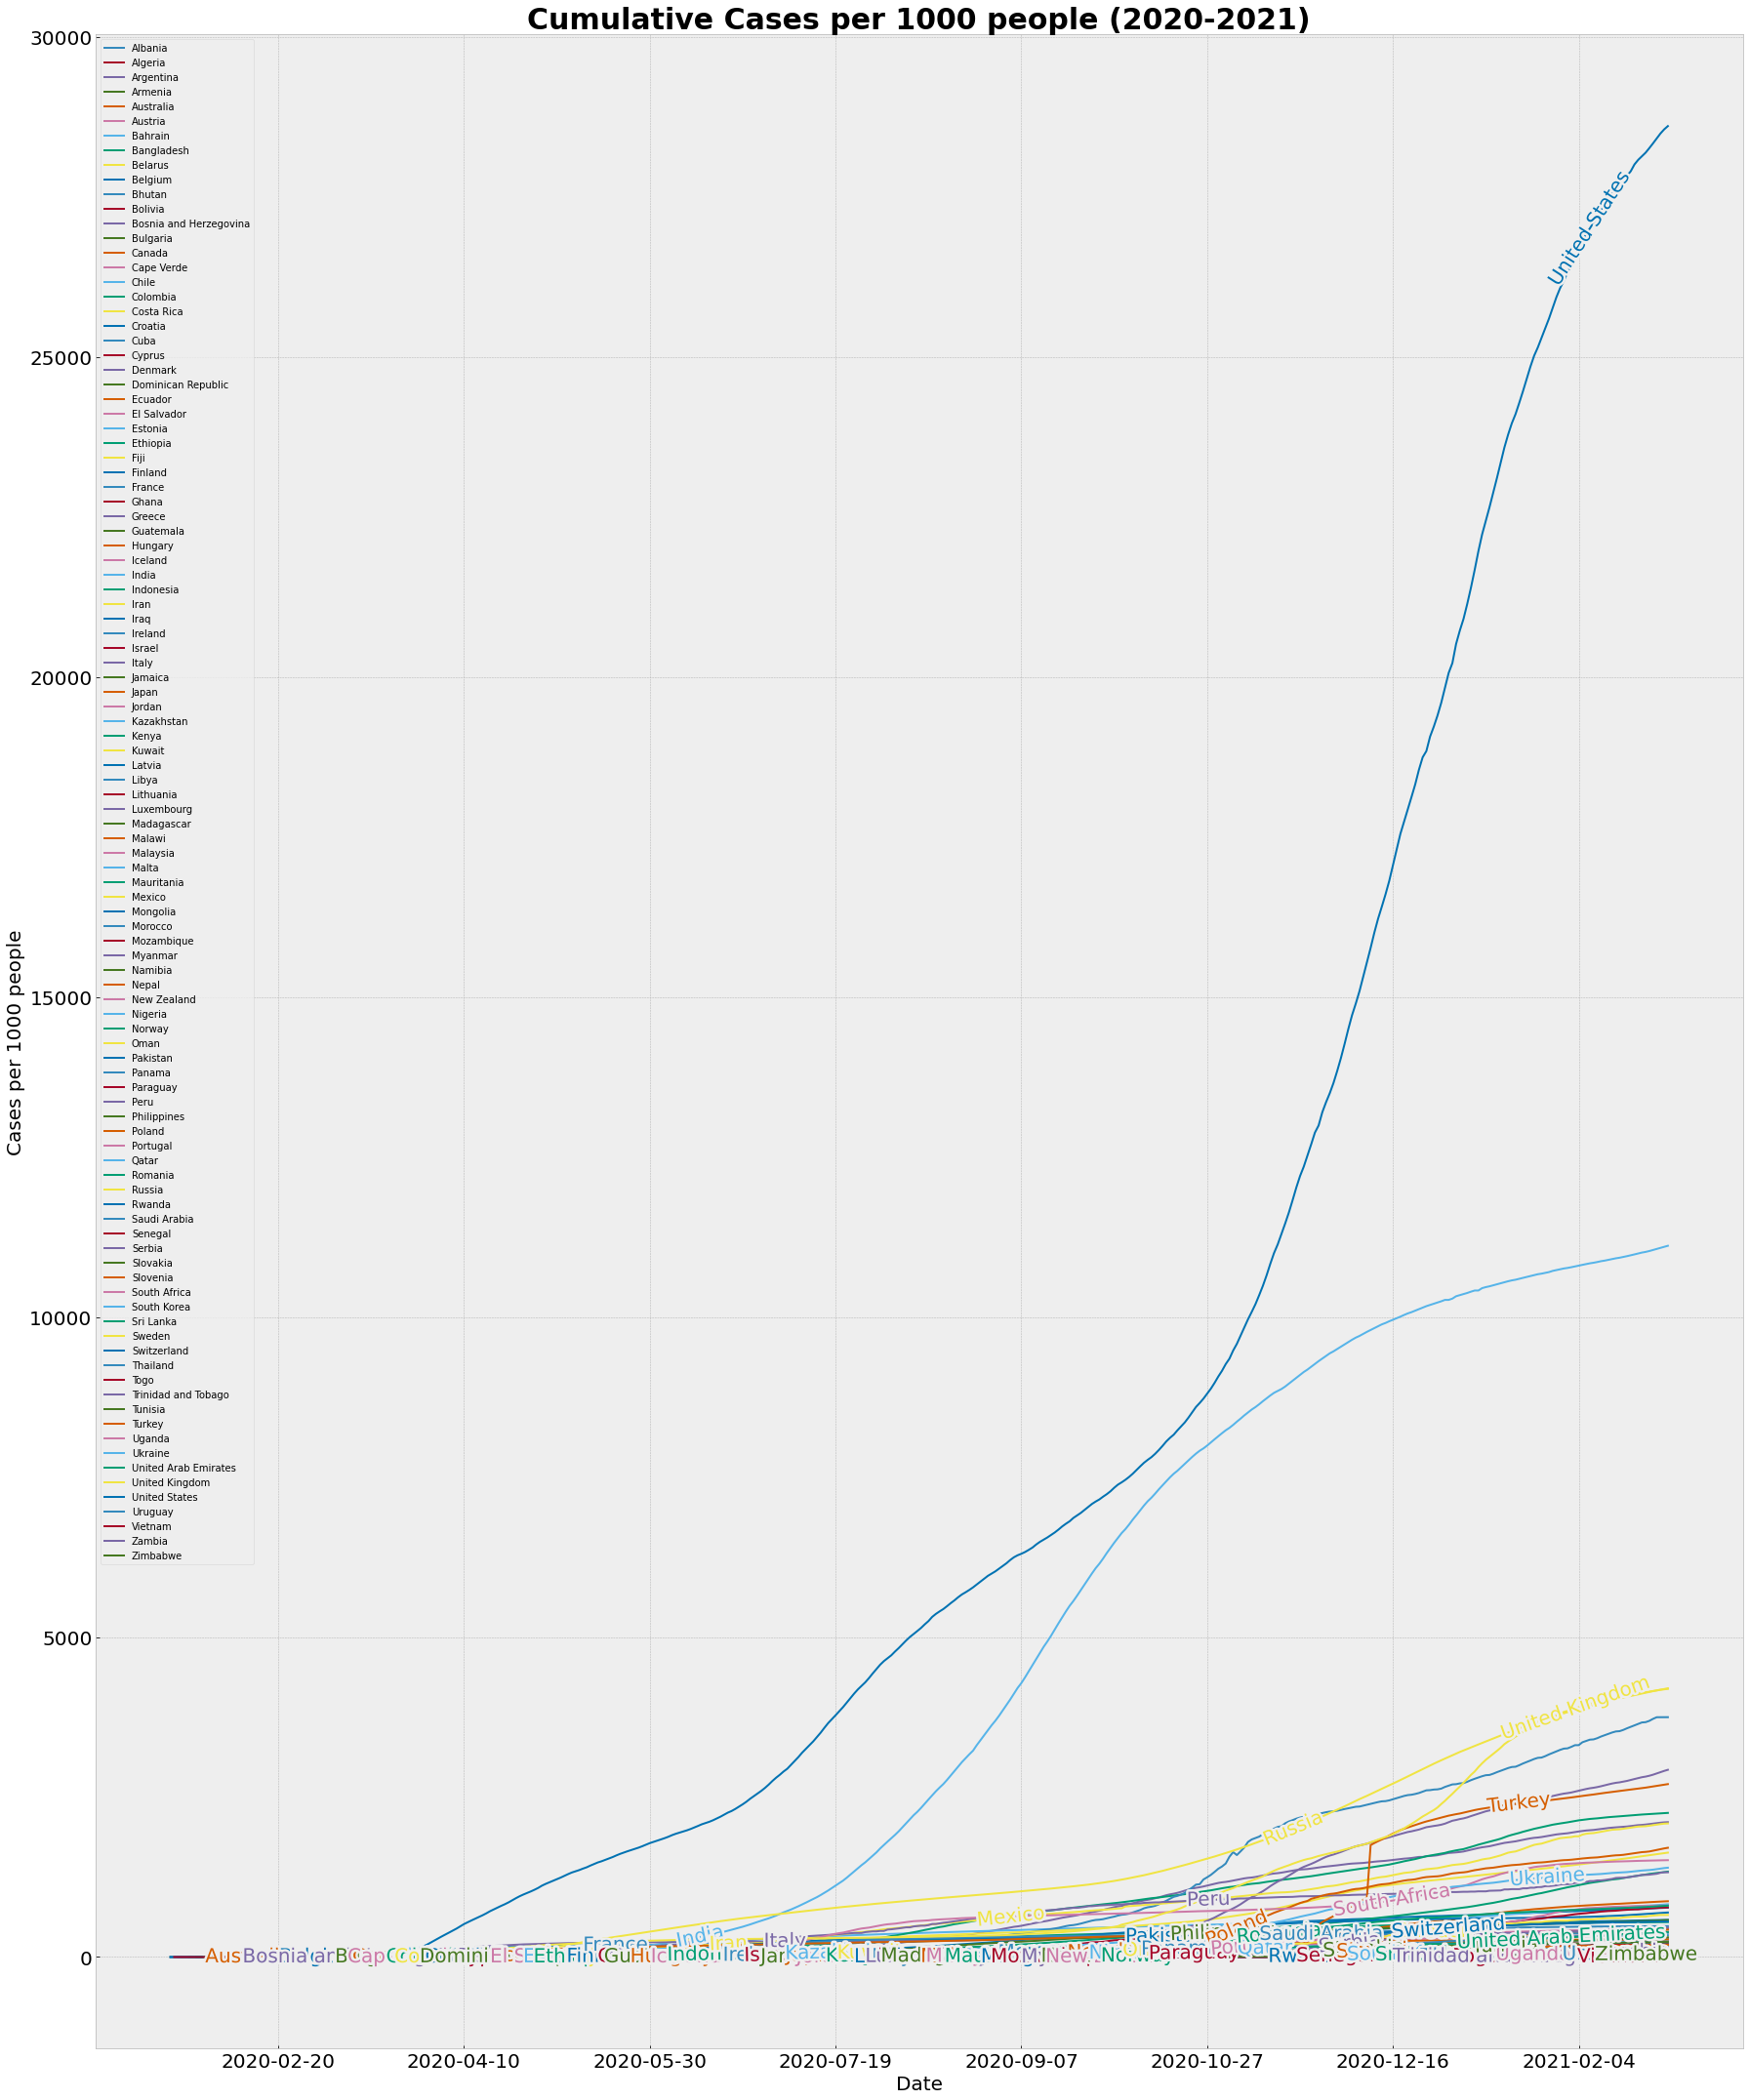

In [94]:
# Plotting cumulative cases per 1000 for all listed countries.
ax = data3.plot(figsize = (25,30), use_index=True)
ax.set_ylabel("Cases per 1000 people", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.get_legend().remove()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ["Lucida Grande"]
plt.title('Cumulative Cases per 1000 people (2020-2021)', fontsize=30, fontweight = "bold")
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=20)
plt.show()

In [34]:
sql4 = """SELECT * FROM cases_sub;"""
data4 = pd.read_sql(sql4, conn, index_col = ['Date'])

/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Argentina) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,


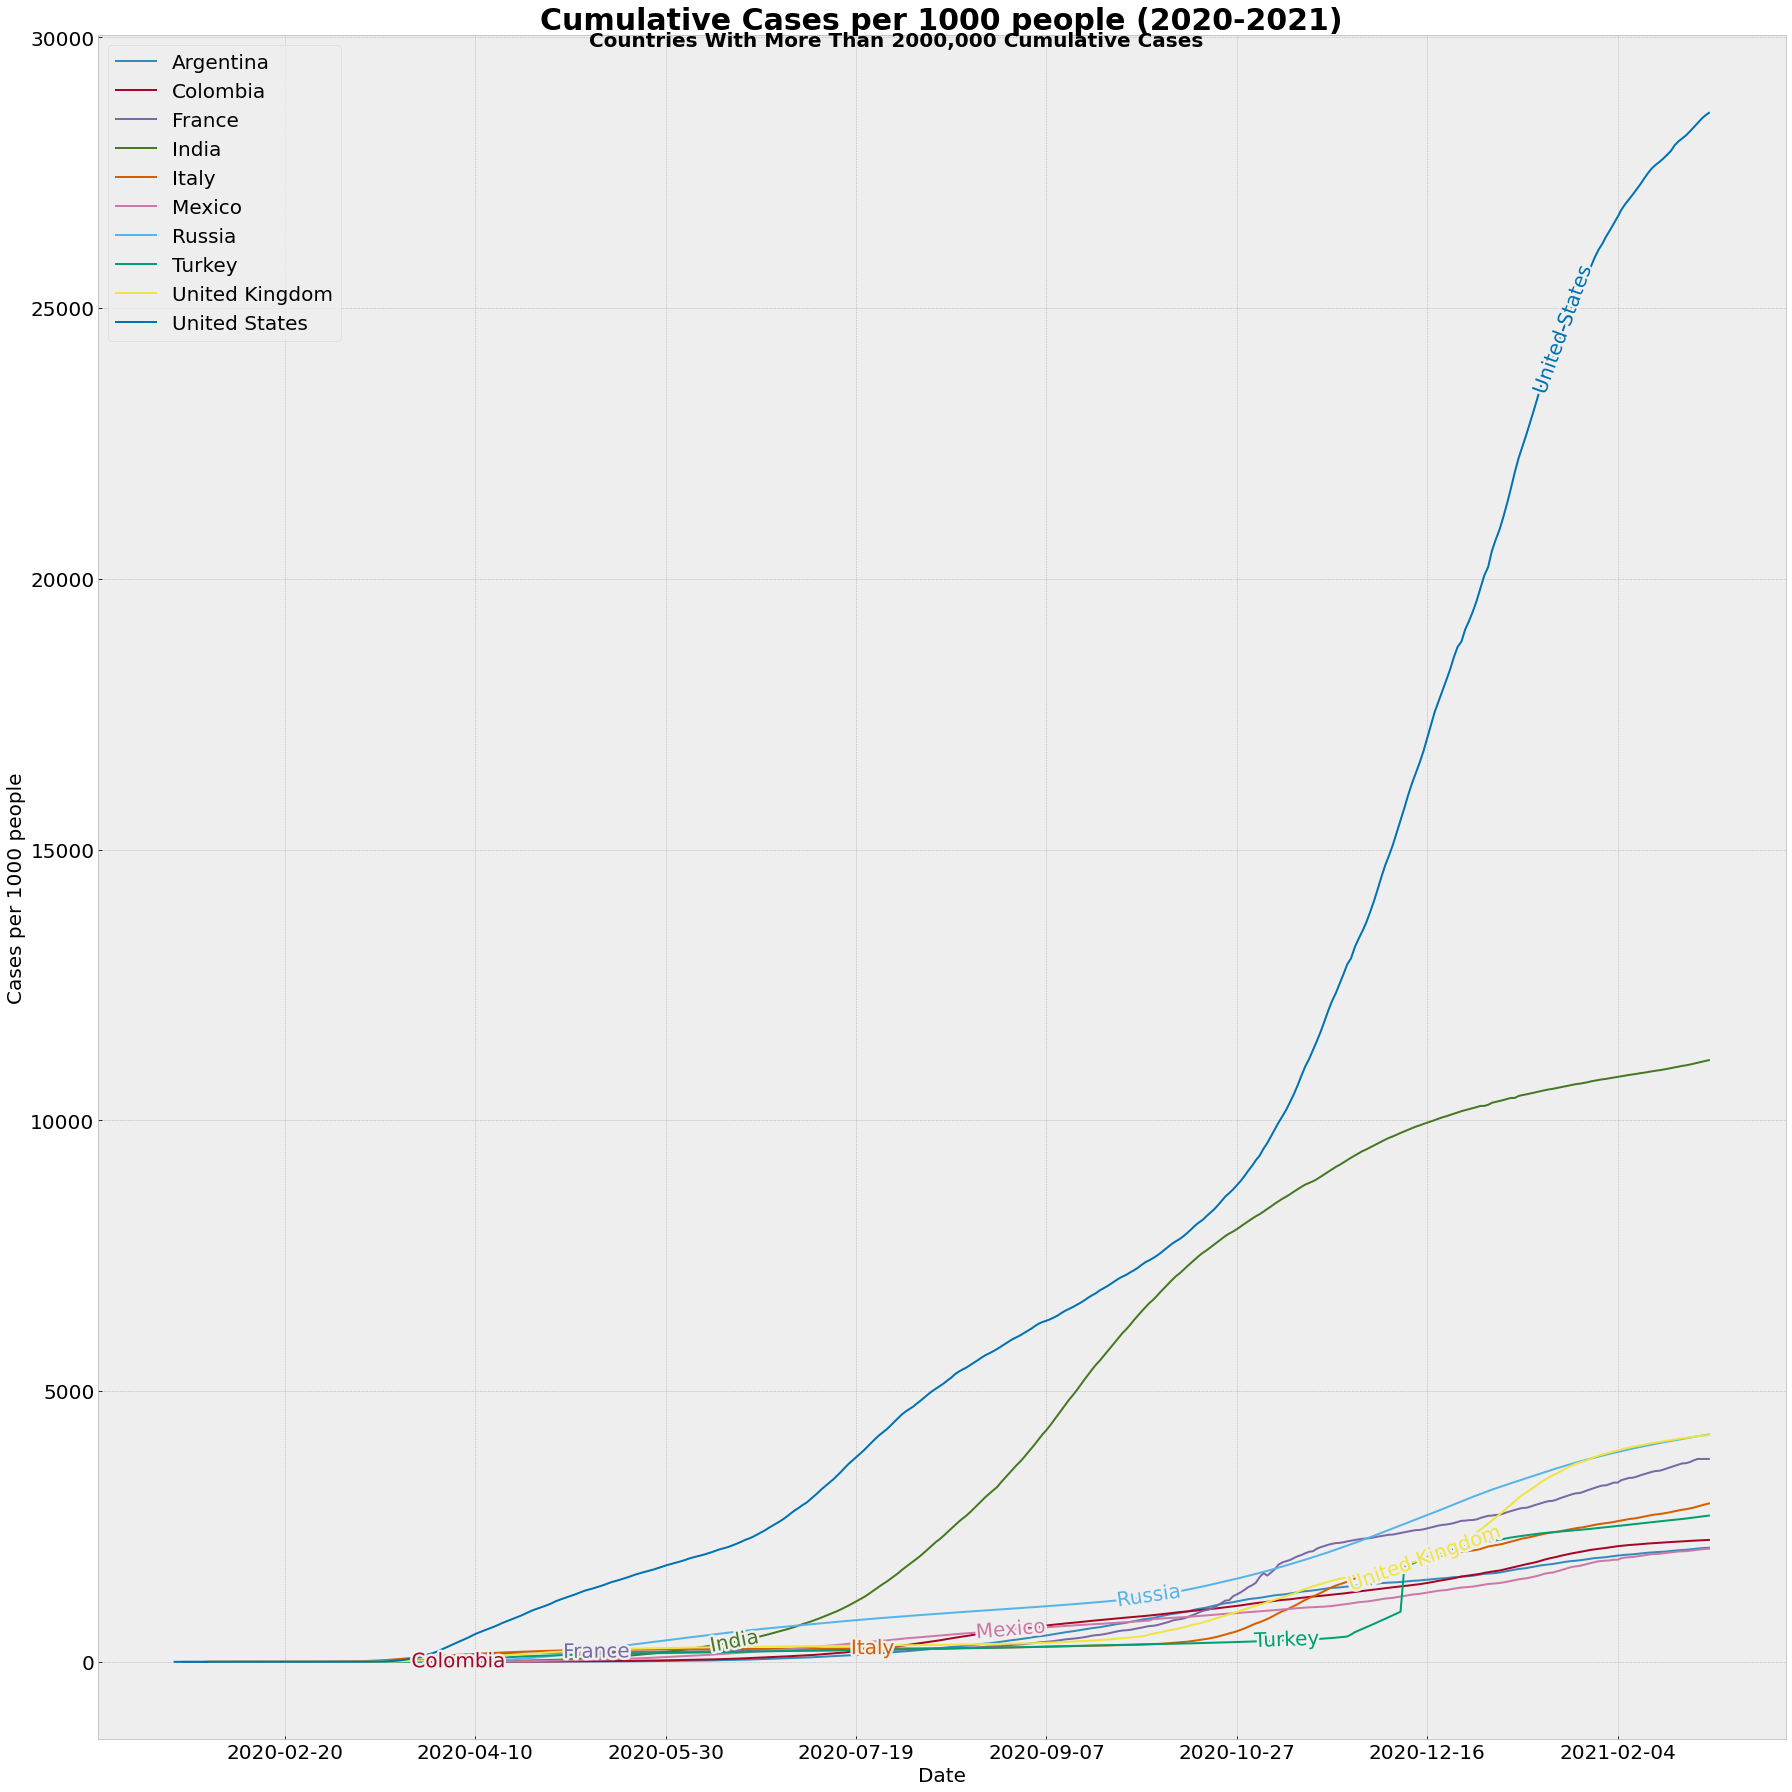

In [163]:
# Plotting cumulative cases per 1000 for subset of countries.
ax = data4.plot(figsize = (25,25), use_index=True)
ax.set_ylabel("Cases per 1000 people", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.get_legend().remove()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ["Lucida Grande"]
plt.title('Cumulative Cases per 1000 people (2020-2021)', fontsize=30, fontweight = "bold")
plt.suptitle('Countries With More Than 2000,000 Cumulative Cases',fontsize=20, fontweight = 'bold')
plt.legend(loc='upper left', fontsize=20)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=20)
plt.show()

### Visualisation: Number of cumulative deaths over time

In [36]:
from labellines import labelLine, labelLines

In [37]:
sql5 = """SELECT * FROM deaths;"""
data5 = pd.read_sql(sql5, conn, index_col = ['Date'])

/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Albania) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Algeria) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Argentina) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Armenia) could not be annotated due to `nans` values. Consider using another location via the `x` argument.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/labellines/core.py:73: UserWarning: Line2D(Australia) could not be annotated due to `nans` values. Consider using another location via the 

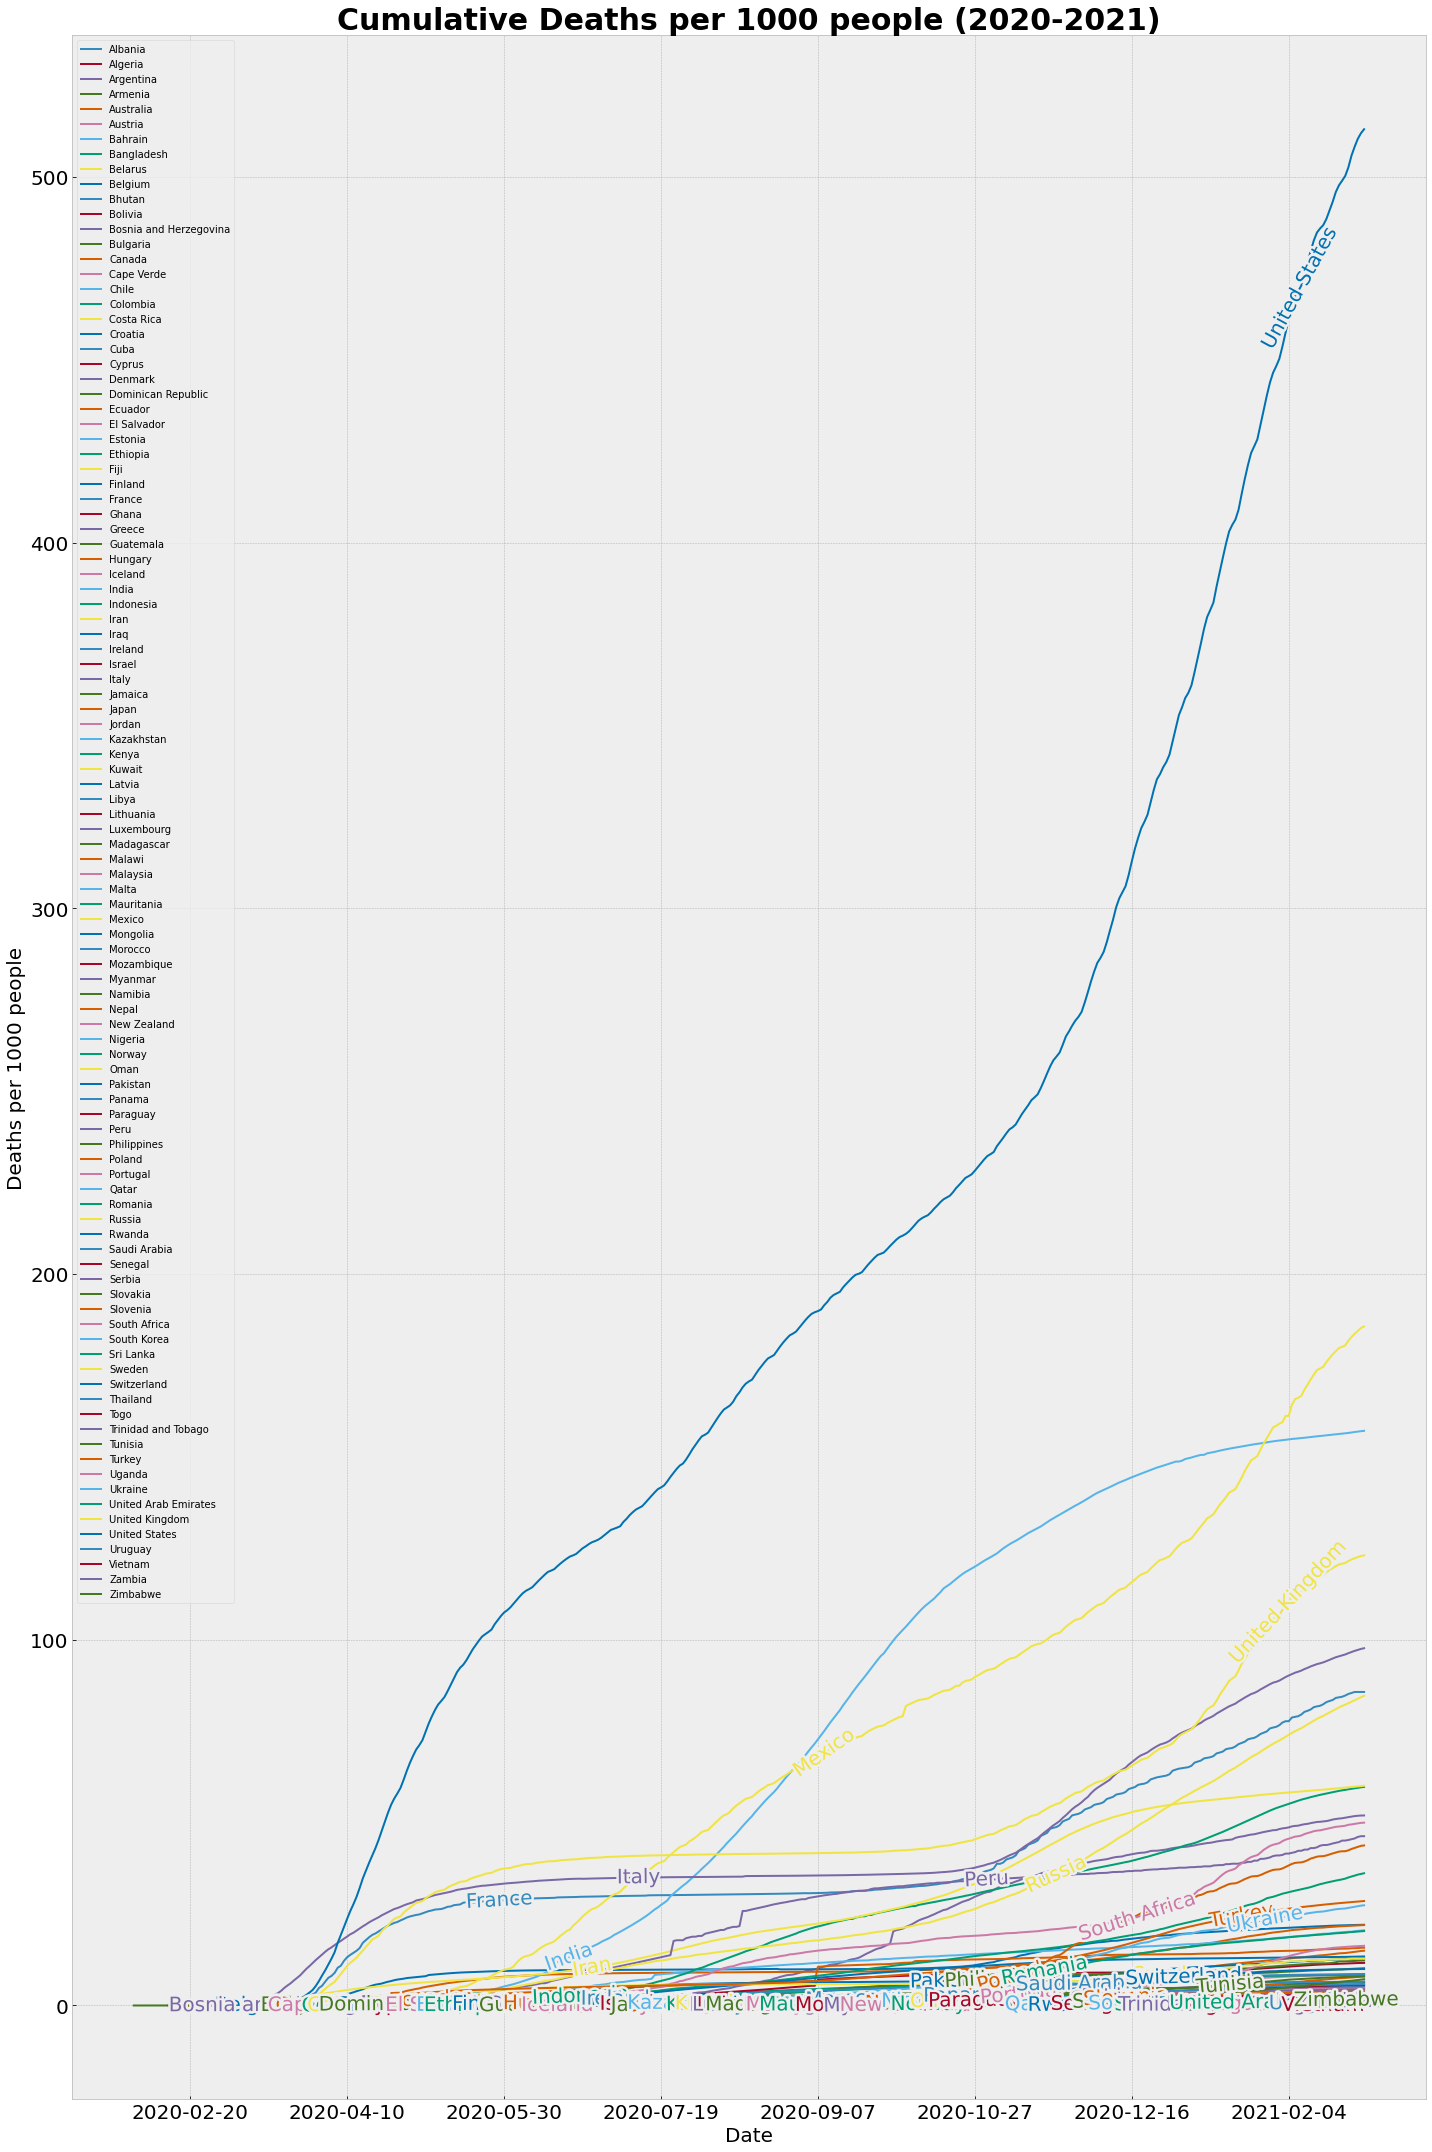

In [91]:
# Plotting cumulative deaths per 1000 for all listed countries.
ax = data5.plot(figsize = (20,30), use_index=True)
ax.set_ylabel("Deaths per 1000 people", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.get_legend().remove()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ["Lucida Grande"]
plt.title('Cumulative Deaths per 1000 people (2020-2021)', fontsize=30, fontweight = "bold")
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=20)
plt.show()

In [39]:
sql6 = """SELECT * FROM deaths_sub;"""
data6 = pd.read_sql(sql6, conn, index_col = ['Date'])

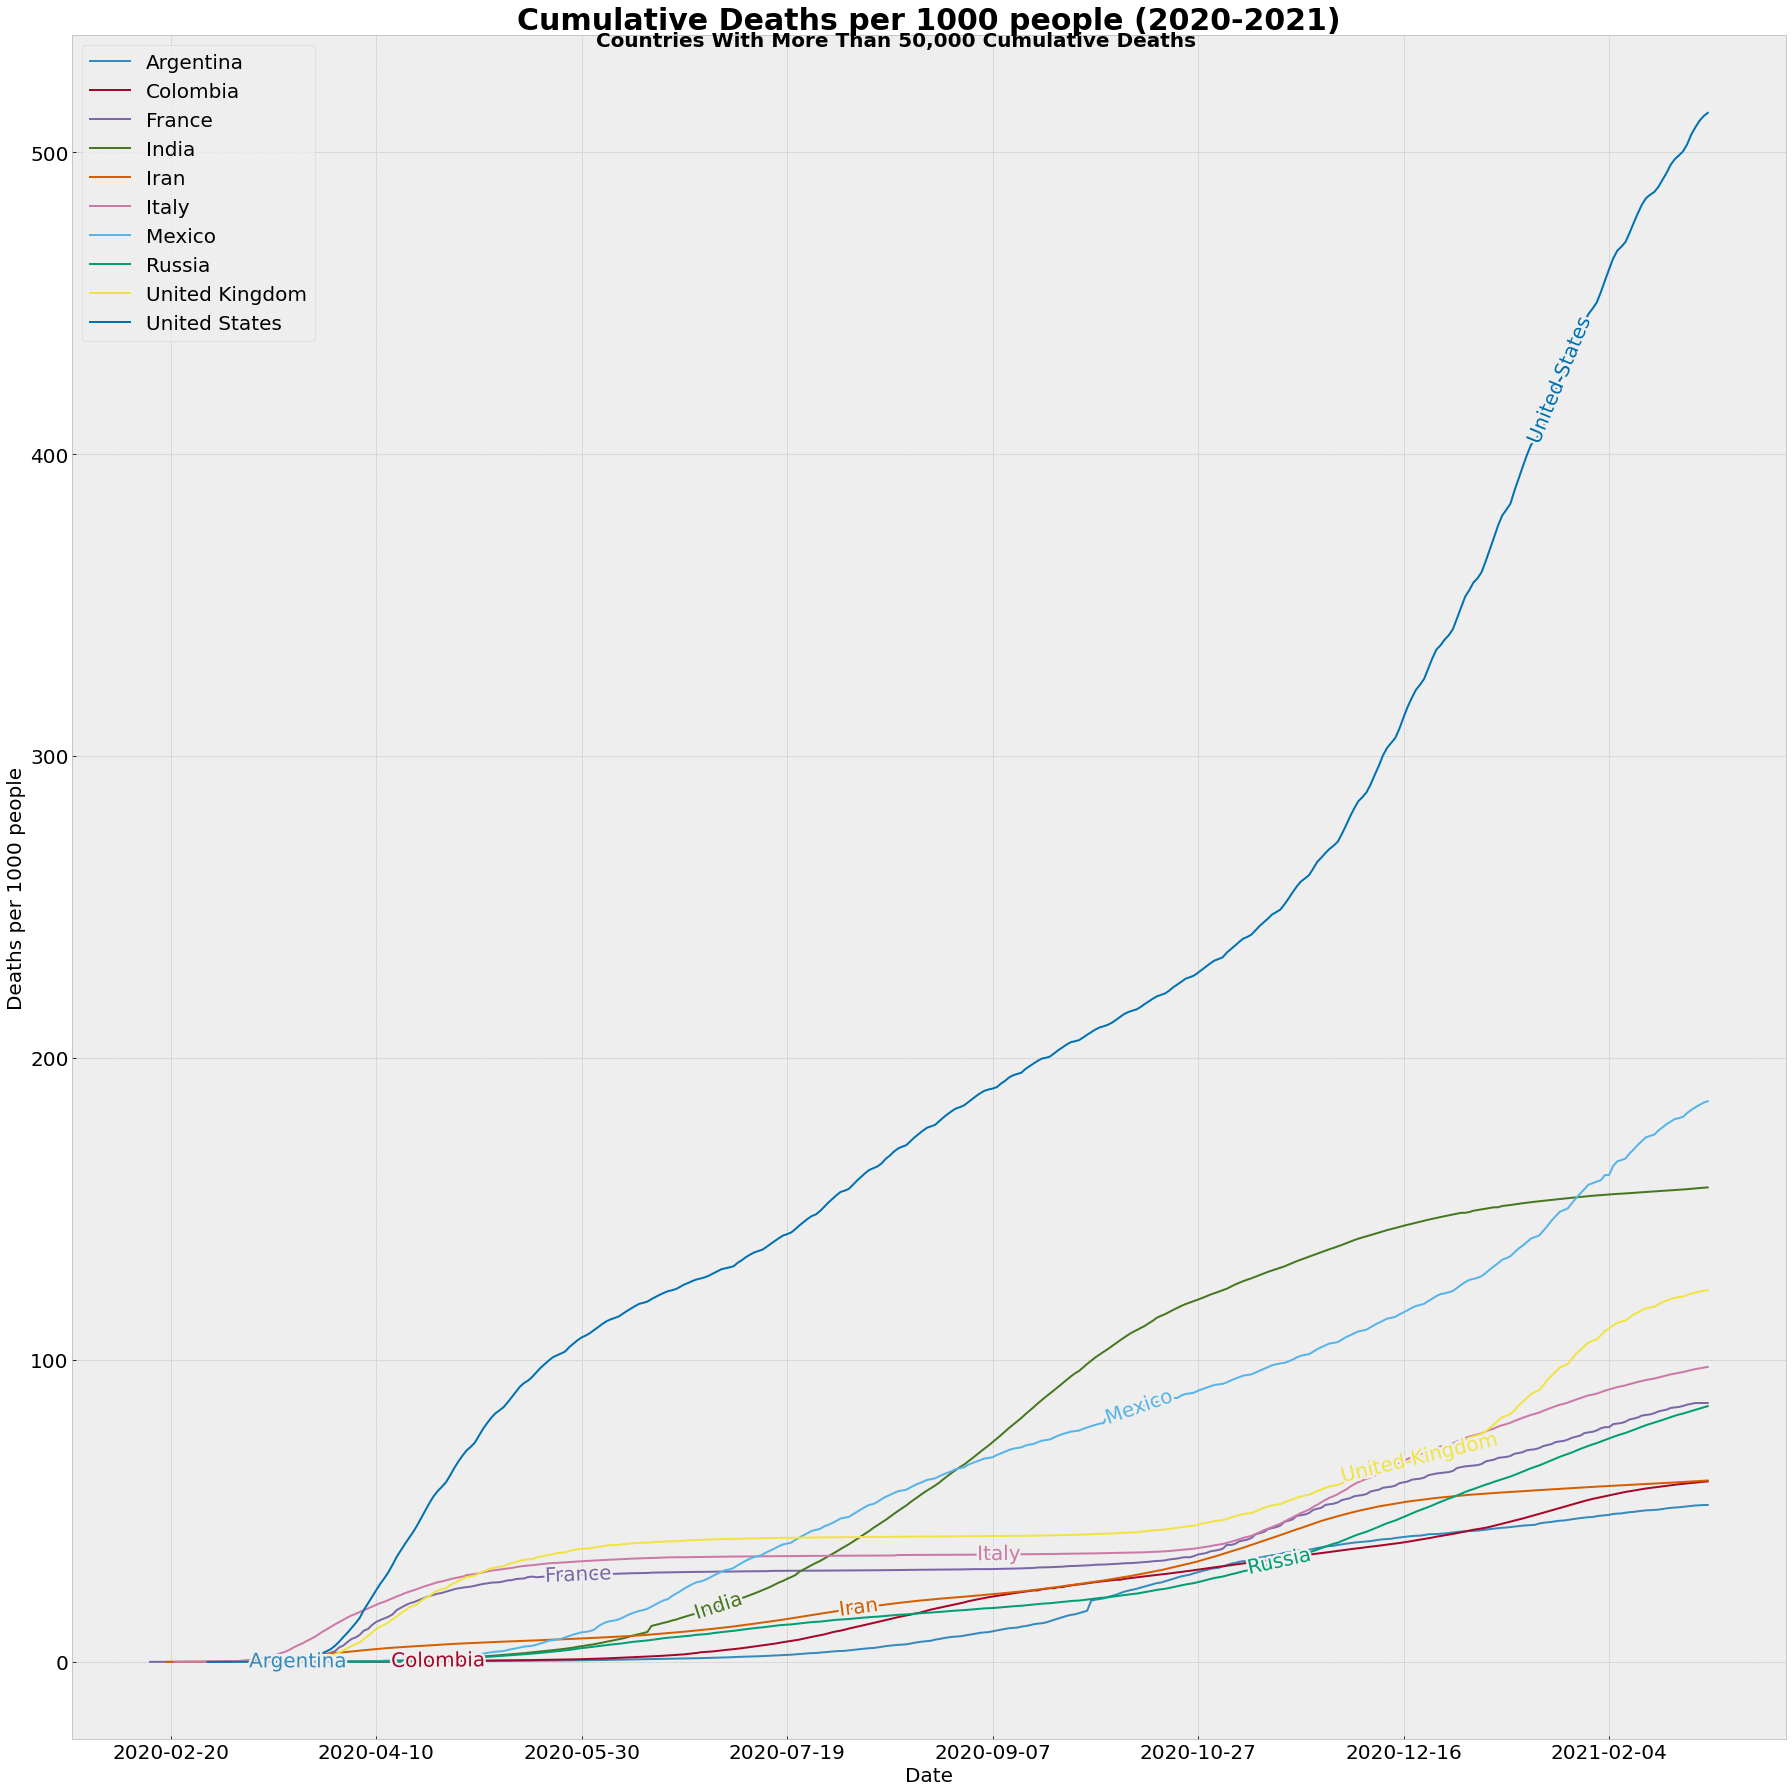

In [164]:
# Plotting cumulative deaths per 1000 for subset of countries.
ax = data6.plot(figsize = (25,25), use_index=True)
ax.set_ylabel("Deaths per 1000 people", fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
#ax.get_legend().remove()
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ["Lucida Grande"]
plt.title('Cumulative Deaths per 1000 people (2020-2021)', fontsize=30, fontweight = "bold")
plt.suptitle('Countries With More Than 50,000 Cumulative Deaths',fontsize=20, fontweight = 'bold')
plt.legend(loc='upper left', fontsize=20)
plt.tight_layout()
plt.style.use('bmh')
plt.grid(True)
labelLines(plt.gca().get_lines(), zorder=2.5, fontsize=20)
plt.show()

### Visualisation: World map of average daily tests

In [41]:
sql7 = """SELECT daily.CODE, daily.Entity, AVG(daily.DailyTests_per_1000) AS [AverageTestsper1000], country.Latitude, country.Longitude FROM daily
LEFT JOIN country ON country.id=daily.id
GROUP BY daily.Entity;"""
data7 = pd.read_sql(sql7, conn)

In [42]:
data7

CODE         Entity  AverageTestsper1000  Latitude  Longitude
0     ALB        Albania             1.192832     41.15      20.17
1     DZA        Algeria             1.033333     28.03       1.66
2     ARG      Argentina            15.390745    -38.42     -63.62
3     ARM        Armenia             1.880340     40.07      45.04
4     AUS      Australia            41.312128    -25.27     133.78
..    ...            ...                  ...       ...        ...
99    USA  United States           912.236261     37.09     -95.71
100   URY        Uruguay             3.013139    -32.52     -55.77
101  None        Vietnam             5.753293     14.06     108.28
102   ZMB         Zambia             3.390601    -13.13      27.85
103   ZWE       Zimbabwe             1.272080    -19.02      29.15

[104 rows x 5 columns]

In [43]:
# make a geometry object from Lat, Long
geotests = gpd.points_from_xy(data7.Longitude, data7.Latitude) 
# give the geometry to geopandas together with c
gctests = gpd.GeoDataFrame(data7, geometry=geotests)         
gctests.head()

CODE     Entity  AverageTestsper1000  Latitude  Longitude  \
0  ALB    Albania             1.192832     41.15      20.17   
1  DZA    Algeria             1.033333     28.03       1.66   
2  ARG  Argentina            15.390745    -38.42     -63.62   
3  ARM    Armenia             1.880340     40.07      45.04   
4  AUS  Australia            41.312128    -25.27     133.78   

                      geometry  
0    POINT (20.17000 41.15000)  
1     POINT (1.66000 28.03000)  
2  POINT (-63.62000 -38.42000)  
3    POINT (45.04000 40.07000)  
4  POINT (133.78000 -25.27000)

In [44]:
# Merging datasets for visualisation
# https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']  # Renaming iso_a3 column to CODE columns will match in both datasets

mergetests = pd.merge(world, gctests, on='CODE')

mergetests = mergetests.rename(columns = {"geometry_x": "geometry"})

mergetests = mergetests.drop(columns = ['geometry_y'])

mergetests = mergetests.sort_values(by='AverageTestsper1000', ascending=False)

mergetests = mergetests.reset_index()

In [148]:
mergetests.head()

index     pop_est      continent                      name CODE  \
0      2   326625791  North America  United States of America  USA   
1     44  1281935911           Asia                     India  IND   
2     75    64769452         Europe            United Kingdom  GBR   
3     73    62137802         Europe                     Italy  ITA   
4     62    80845215           Asia                    Turkey  TUR   

   gdp_md_est                                           geometry  \
0  18560000.0  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
1   8721000.0  POLYGON ((97.32711 28.26158, 97.40256 27.88254...   
2   2788000.0  MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...   
3   2221000.0  MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...   
4   1670000.0  MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...   

           Entity  AverageTestsper1000  Latitude  Longitude  
0   United States           912.236261     37.09     -95.71  
1           India           639.512728     20.59      78.96  
2  United Kingdom           251.806728     55.38      -3.44  
3           Italy           106.874899     41.87      12.57  
4          Turkey            97.532690     38.96      35.24

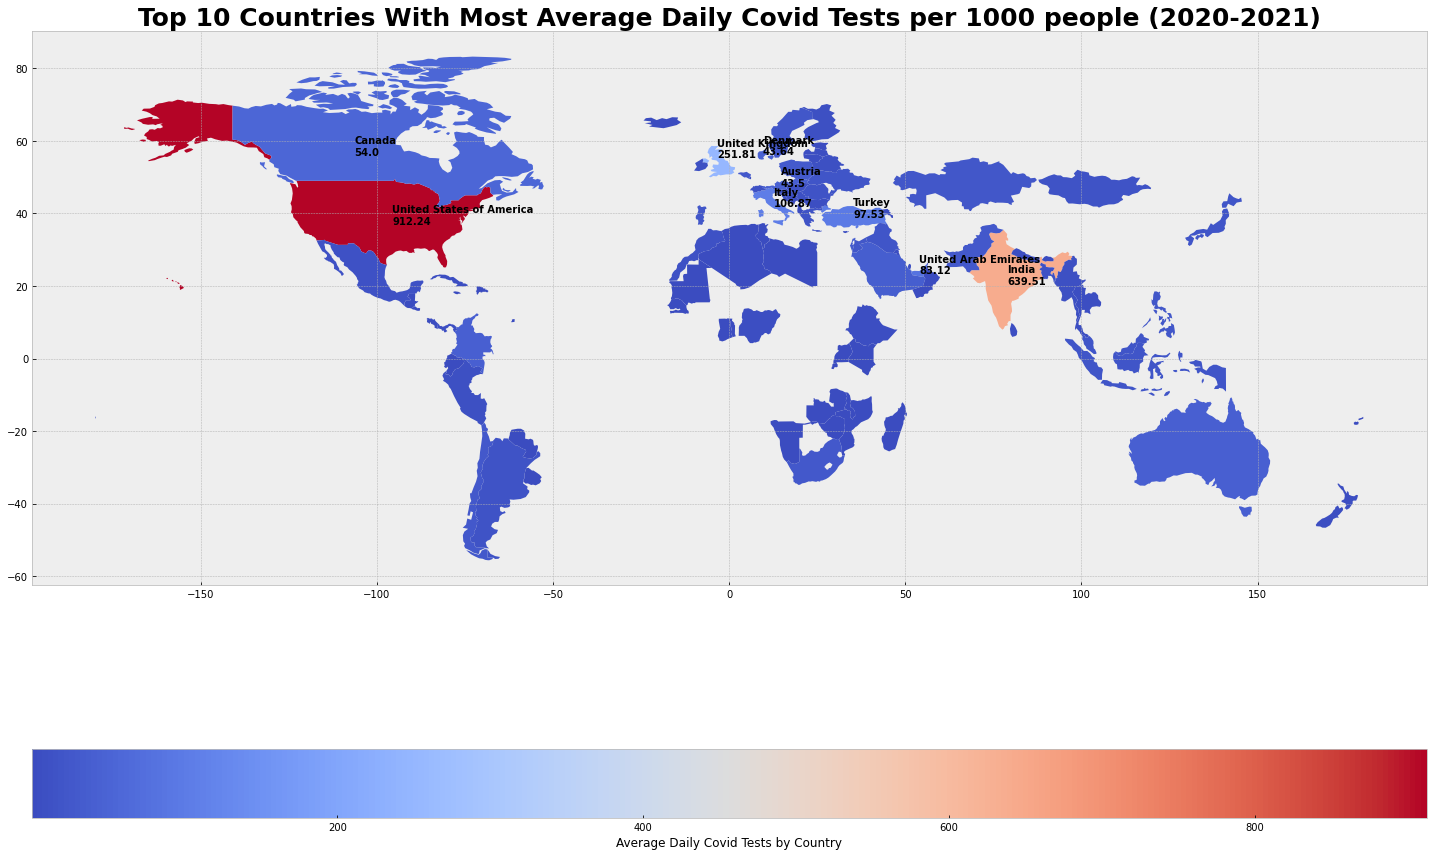

In [154]:
# plot test world map 
mergetests.plot(column='AverageTestsper1000',
           figsize=(25, 20),
           legend=True,cmap='coolwarm',
           legend_kwds={'label': "Average Daily Covid Tests by Country",'orientation': "horizontal"},
           missing_kwds={'color': 'lightgrey'})
plt.title('Top 10 Countries With Most Average Daily Covid Tests per 1000 people (2020-2021)',fontsize=25, fontweight = "bold")
# add countries names and numbers 
for i in range(0,9):
    plt.text(float(mergetests.Longitude[i]),float(mergetests.Latitude[i]),"{}\n{}".format(mergetests.name[i],round(mergetests.AverageTestsper1000[i],2)),size=10, fontweight = "bold")
plt.show()

### Visualisation: World map of cumulative cases

In [137]:
sql8 = """SELECT daily.CODE, daily.Entity, daily.Date, daily.Cases_per_1000 AS [Casesper1000_Slice], country.Latitude, country.Longitude FROM daily
LEFT JOIN country ON country.id=daily.id
GROUP BY daily.Entity;"""
data8 = pd.read_sql(sql8, conn)

In [138]:
data8

CODE         Entity        Date  Casesper1000_Slice  Latitude  Longitude
0     ALB        Albania  2021-02-28             107.167     41.15      20.17
1     DZA        Algeria  2021-02-28             113.092     28.03       1.66
2     ARG      Argentina  2021-02-28            2107.365    -38.42     -63.62
3     ARM        Armenia  2021-02-28             172.058     40.07      45.04
4     AUS      Australia  2021-02-28              28.978    -25.27     133.78
..    ...            ...         ...                 ...       ...        ...
99    USA  United States  2021-02-28           28605.669     37.09     -95.71
100   URY        Uruguay  2021-02-28              57.994    -32.52     -55.77
101  None        Vietnam  2021-02-28               2.448     14.06     108.28
102   ZMB         Zambia  2021-02-28              78.534    -13.13      27.85
103   ZWE       Zimbabwe  2021-02-28              36.089    -19.02      29.15

[104 rows x 6 columns]

In [103]:
# make a geometry object from Lat, Long
geocases = gpd.points_from_xy(data8.Longitude, data8.Latitude) 
# give the geometry to geopandas together with c
gccases = gpd.GeoDataFrame(data8, geometry=geocases)         
gccases.head()

CODE     Entity        Date  Casesper1000_Slice  Latitude  Longitude  \
0  ALB    Albania  2021-02-28             107.167     41.15      20.17   
1  DZA    Algeria  2021-02-28             113.092     28.03       1.66   
2  ARG  Argentina  2021-02-28            2107.365    -38.42     -63.62   
3  ARM    Armenia  2021-02-28             172.058     40.07      45.04   
4  AUS  Australia  2021-02-28              28.978    -25.27     133.78   

                      geometry  
0    POINT (20.17000 41.15000)  
1     POINT (1.66000 28.03000)  
2  POINT (-63.62000 -38.42000)  
3    POINT (45.04000 40.07000)  
4  POINT (133.78000 -25.27000)

In [105]:
# Merging datasets for visualisation
# https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']  # Renaming iso_a3 column to CODE columns will match in both datasets

mergecases = pd.merge(world, data8, on='CODE')
mergecases = mergecases.rename(columns = {"geometry_x": "geometry"})
mergecases = mergecases.drop(columns = ['geometry_y'])
mergecases = mergecases.sort_values(by='Casesper1000_Slice', ascending=False)
mergecases = mergecases.reset_index()

In [106]:
mergecases.head()

index     pop_est      continent                      name CODE  \
0      2   326625791  North America  United States of America  USA   
1     44  1281935911           Asia                     India  IND   
2     75    64769452         Europe            United Kingdom  GBR   
3     73    62137802         Europe                     Italy  ITA   
4     62    80845215           Asia                    Turkey  TUR   

   gdp_md_est                                           geometry  \
0  18560000.0  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
1   8721000.0  POLYGON ((97.32711 28.26158, 97.40256 27.88254...   
2   2788000.0  MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...   
3   2221000.0  MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...   
4   1670000.0  MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...   

           Entity        Date  Casesper1000_Slice  Latitude  Longitude  
0   United States  2021-02-28           28605.669     37.09     -95.71  
1           India  2021-02-28           11112.241     20.59      78.96  
2  United Kingdom  2021-02-28            4188.827     55.38      -3.44  
3           Italy  2021-02-28            2925.265     41.87      12.57  
4          Turkey  2021-02-28            2701.588     38.96      35.24

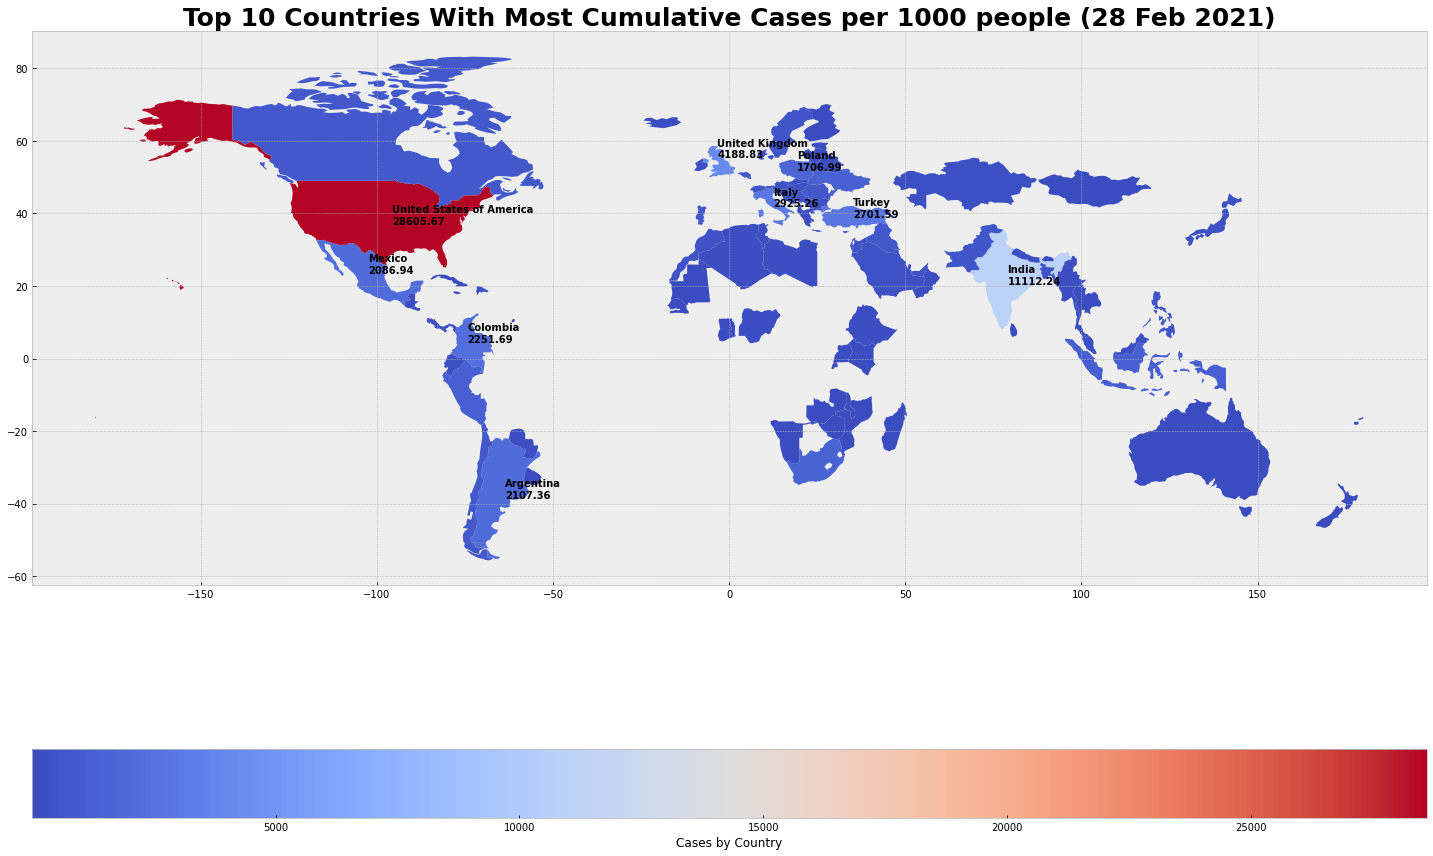

In [153]:
# plot test world map 
mergecases.plot(column='Casesper1000_Slice',
           figsize=(25, 20),
           legend=True,cmap='coolwarm',
           legend_kwds={'label': "Cases by Country",'orientation': "horizontal"},
           missing_kwds={'color': 'lightgrey'})
plt.title('Top 10 Countries With Most Cumulative Cases per 1000 people (28 Feb 2021)',fontsize=25, fontweight = "bold")
# add countries names and numbers 
for i in range(0,9):
    plt.text(float(mergecases.Longitude[i]),float(mergecases.Latitude[i]),"{}\n{}".format(mergecases.name[i],round(mergecases.Casesper1000_Slice[i],2)),size=10, fontweight = "bold")
plt.show()

### Visualisation: World map of cumulative deaths

In [139]:
sql9 = """SELECT daily.CODE, daily.Entity, daily.Date, daily.Deaths_per_1000 AS [Deathsper1000_slice], country.Latitude, country.Longitude FROM daily
LEFT JOIN country ON country.id=daily.id
GROUP BY daily.Entity;"""
data9 = pd.read_sql(sql9, conn)

In [140]:
data9

CODE         Entity        Date  Deathsper1000_slice  Latitude  Longitude
0     ALB        Albania  2021-02-28                1.796     41.15      20.17
1     DZA        Algeria  2021-02-28                2.983     28.03       1.66
2     ARG      Argentina  2021-02-28               51.965    -38.42     -63.62
3     ARM        Armenia  2021-02-28                3.192     40.07      45.04
4     AUS      Australia  2021-02-28                0.909    -25.27     133.78
..    ...            ...         ...                  ...       ...        ...
99    USA  United States  2021-02-28              513.091     37.09     -95.71
100   URY        Uruguay  2021-02-28                0.608    -32.52     -55.77
101  None        Vietnam  2021-02-28                0.035     14.06     108.28
102   ZMB         Zambia  2021-02-28                1.091    -13.13      27.85
103   ZWE       Zimbabwe  2021-02-28                1.463    -19.02      29.15

[104 rows x 6 columns]

In [141]:
# make a geometry object from Lat, Long
geodeaths = gpd.points_from_xy(data9.Longitude, data9.Latitude) 
# give the geometry to geopandas together with c
gcdeaths = gpd.GeoDataFrame(data9, geometry=geodeaths)         
gcdeaths.head()

CODE     Entity        Date  Deathsper1000_slice  Latitude  Longitude  \
0  ALB    Albania  2021-02-28                1.796     41.15      20.17   
1  DZA    Algeria  2021-02-28                2.983     28.03       1.66   
2  ARG  Argentina  2021-02-28               51.965    -38.42     -63.62   
3  ARM    Armenia  2021-02-28                3.192     40.07      45.04   
4  AUS  Australia  2021-02-28                0.909    -25.27     133.78   

                      geometry  
0    POINT (20.17000 41.15000)  
1     POINT (1.66000 28.03000)  
2  POINT (-63.62000 -38.42000)  
3    POINT (45.04000 40.07000)  
4  POINT (133.78000 -25.27000)

In [143]:
# Merging datasets for visualisation
# https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']  # Renaming iso_a3 column to CODE columns will match in both datasets

mergedeaths = pd.merge(world, gcdeaths, on='CODE')
mergedeaths = mergedeaths.rename(columns = {"geometry_x": "geometry"})
mergedeaths = mergedeaths.drop(columns = ['geometry_y'])
mergedeaths = mergedeaths.sort_values(by='Deathsper1000_slice', ascending=False)
mergedeaths = mergedeaths.reset_index()

In [144]:
mergedeaths.head()

index     pop_est      continent                      name CODE  \
0      2   326625791  North America  United States of America  USA   
1     10   124574795  North America                    Mexico  MEX   
2     44  1281935911           Asia                     India  IND   
3     75    64769452         Europe            United Kingdom  GBR   
4     73    62137802         Europe                     Italy  ITA   

   gdp_md_est                                           geometry  \
0  18560000.0  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...   
1   2307000.0  POLYGON ((-117.12776 32.53534, -115.99135 32.6...   
2   8721000.0  POLYGON ((97.32711 28.26158, 97.40256 27.88254...   
3   2788000.0  MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...   
4   2221000.0  MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...   

           Entity        Date  Deathsper1000_slice  Latitude  Longitude  
0   United States  2021-02-28              513.091     37.09     -95.71  
1          Mexico  2021-02-28              185.715     23.63    -102.55  
2           India  2021-02-28              157.157     20.59      78.96  
3  United Kingdom  2021-02-28              123.083     55.38      -3.44  
4           Italy  2021-02-28               97.699     41.87      12.57

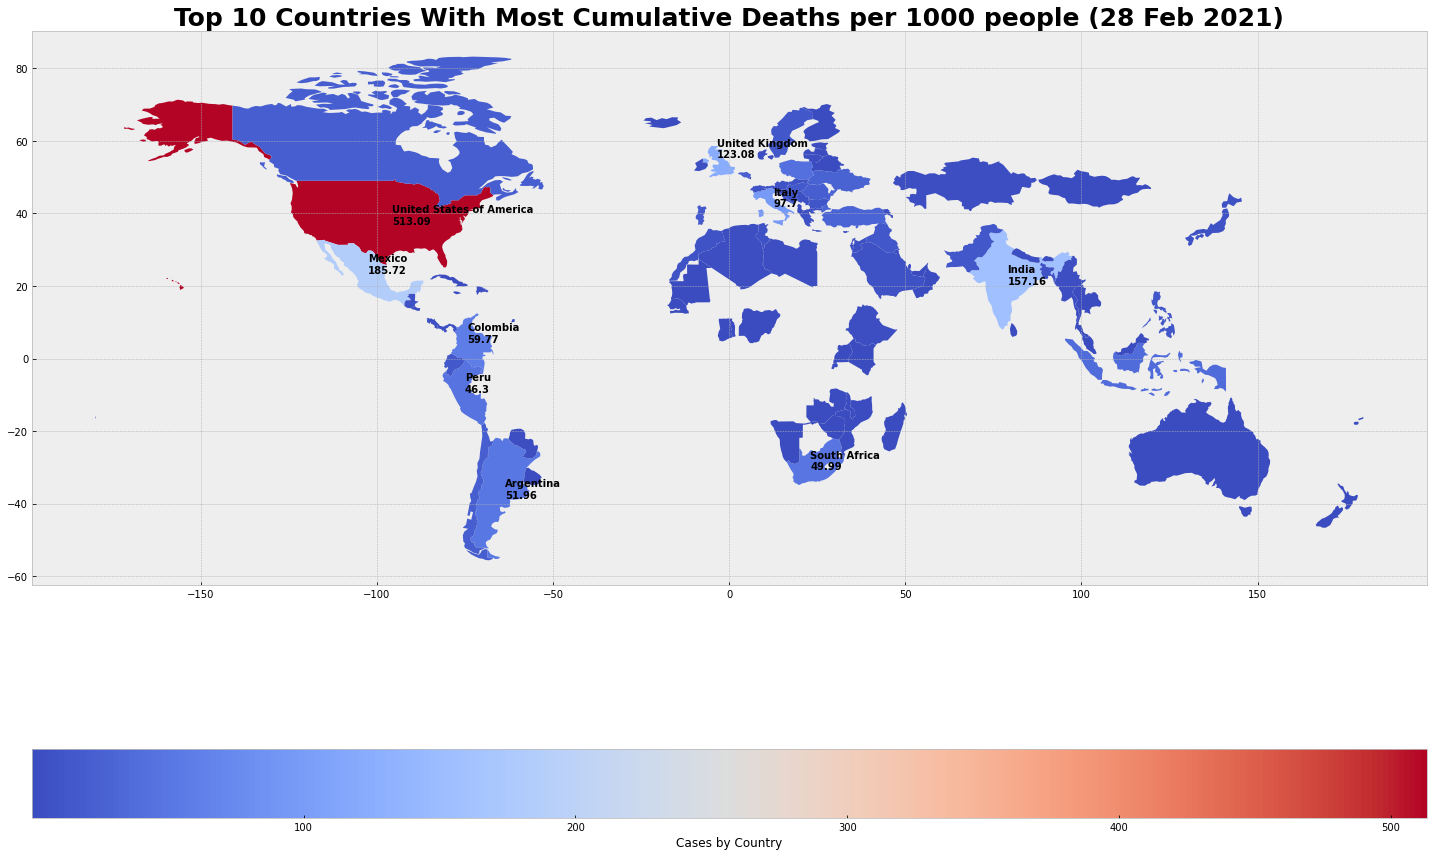

In [155]:
# plot test world map 
mergedeaths.plot(column='Deathsper1000_slice',
           figsize=(25, 20),
           legend=True,cmap='coolwarm',
           legend_kwds={'label': "Cases by Country",'orientation': "horizontal"},
           missing_kwds={'color': 'lightgrey'})
plt.title('Top 10 Countries With Most Cumulative Deaths per 1000 people (28 Feb 2021)',fontsize=25, fontweight = "bold")
# add countries names and numbers 
for i in range(0,9):
    plt.text(float(mergedeaths.Longitude[i]),float(mergedeaths.Latitude[i]),"{}\n{}".format(mergedeaths.name[i],round(mergedeaths.Deathsper1000_slice[i],2)),size=10, fontweight = "bold")
plt.show()